In [414]:
from src.edges_and_fitting import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


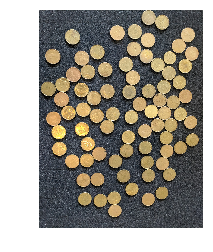

In [415]:
%matplotlib inline

im = plt.imread("img/coins1.jpg")
plot(im)
bw_im = np.mean(im,axis=2)

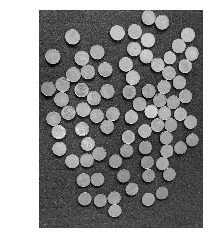

In [416]:
plot(conv2d(im,np.ones((3,3))),**{'cmap':'gray'})

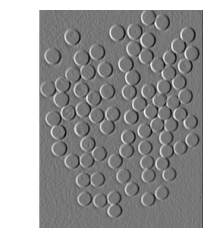

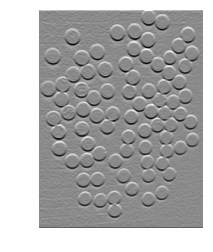

In [417]:
gx =  DOG(21,21,21/3,'x')
gy =  DOG(21,21,21/3,'y')
        
plot(conv2d_loop(bw_im,gx),**{'cmap':'gray'})
plot(conv2d_loop(bw_im,gy),**{'cmap':'gray'})

Sanity check: True


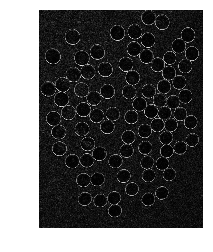

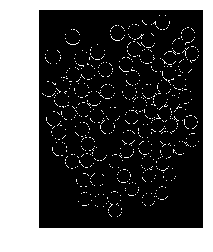

In [418]:
canny1 = canny(bw_im/255,th=0.4,gsize=(7,7),sigma=7/3)

# Get Proposals:

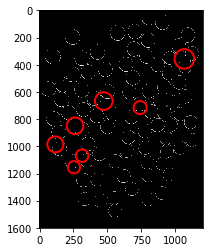

In [419]:
count=0
for i in range(1):
    circles = get_proposals(canny1.pts,canny1.n,d=50,s=300,N=500,T=800)

    plt.imshow(canny1.S,**{'cmap':'gray'})
    for circle in circles:
        a,b =circle[:2]
        R = circle[2]
        circle = Circle((b,a),radius=R,color='red',fill=False,**{"linewidth":2})
        ax = plt.gca()
        ax.add_patch(circle)
        plt.axis('scaled')
    plt.show()
    count +=len(circles)

# Best Proposal

In [420]:
circles = get_proposals(canny1.pts,canny1.n,d=50,s=300,N=500,T=800)

In [421]:
def best_proposal(circles,pts,sigmaGM):
    di = pts[:,:,np.newaxis] - np.array(circles)[:,:2].T
    di = np.sum(di**2,axis=1)
    ek = (di - np.array(circles)[:,2]**2)
    weights = (2*np.ones(len(circles))*sigmaGM**2/(ek**2 + np.ones(len(circles))*sigmaGM**2)**2)
    idx_max = np.argmax(np.sum(weights,axis=0))
    
    inliers = di[:,idx_max] < (circles[idx_max][2]+30)**2
    return circles[idx_max],inliers

In [425]:
canny1.S[pts.T.tolist()]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1600 but corresponding boolean dimension is 49374

830.697128948648 107.80397839697035 45


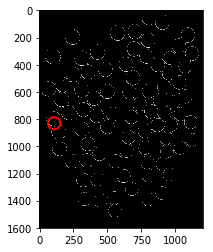

In [422]:
best_circle,pts = best_proposal(circles,canny1.pts,10)

plt.imshow(canny1.S,**{'cmap':'gray'})
a,b =best_circle[:2]
R = best_circle[2]
circle = Circle((b,a),radius=R,color='red',fill=False,**{"linewidth":2})
ax = plt.gca()
ax.add_patch(circle)
#plt.axis('scaled')
print(a,b,R)

## Check proposals

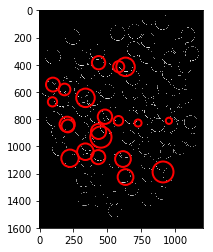

In [294]:
plt.imshow(canny1.S,**{'cmap':'gray'})
for circle in circles:
    a,b =circle[:2]
    R = circle[2]
    circle = Circle((b,a),radius=R,color='red',fill=False,**{"linewidth":2})
    ax = plt.gca()
    ax.add_patch(circle)
    plt.axis('scaled')
    plt.draw()
plt.show()

In [300]:
di = canny1.pts[:,:,np.newaxis] - np.array(circles)[:,:2].T
di = np.sum(di**2,axis=1)
ek = (di - np.array(circles)[:,2]**2)
sigmaGM=10
weights = (2*np.ones(len(circles))*sigmaGM**2/(ek**2 + np.ones(len(circles))*sigmaGM**2)**2)
inliers = canny1.pts[di[:,10] < (circles[10][2]+20)**2]

------
0.008219085201953762


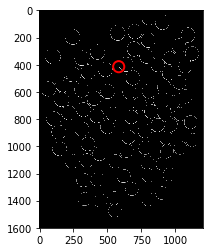

------
------
0.0097983263299034


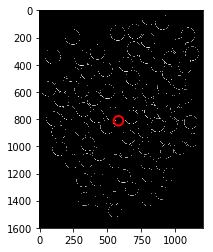

------
------
0.07665512887453704


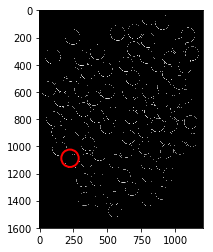

------
------
0.013943112285469279


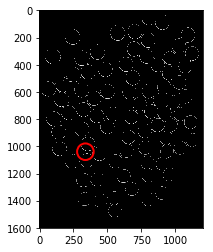

------
------
0.0822469368155587


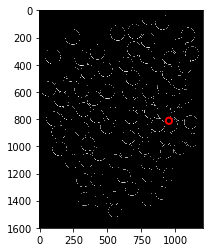

------
------
0.016551349722484093


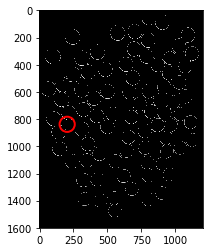

------
------
0.03761707718159407


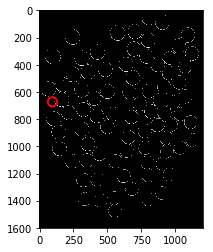

------
------
0.021560282735618122


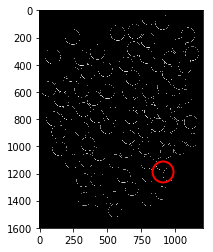

------
------
0.10179835510445524


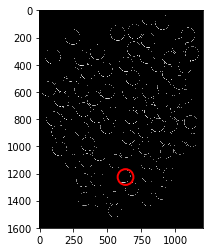

------
------
0.015763905492219756


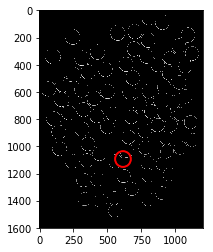

------
------
0.003368678286385204


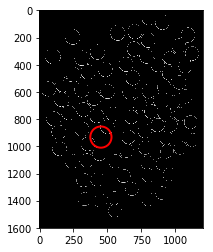

------
------
0.06427302471194923


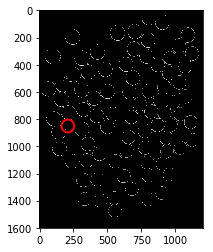

------
------
0.0013814503073235876


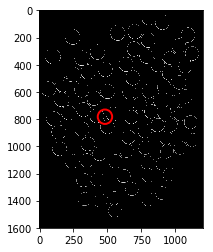

------
------
0.03645812286627003


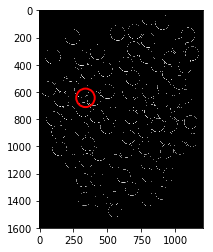

------
------
0.05538602354197935


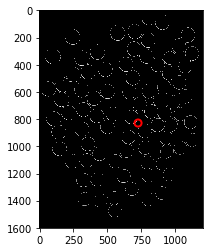

------
------
0.03777155642069768


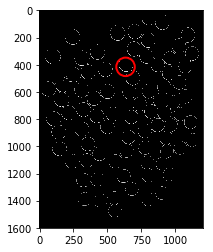

------
------
0.003911658733653732


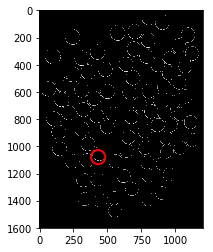

------
------
0.010821758555797256


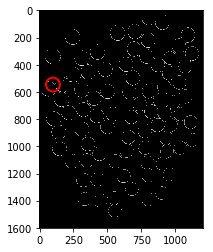

------
------
0.06233158103405933


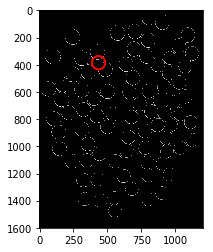

------
------
0.042805664271650425


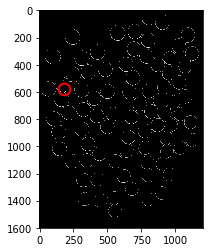

------
------
0.01540527976624687


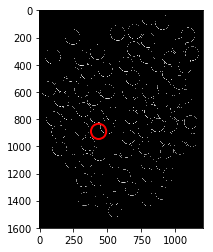

------


In [225]:
for i in range(ek[0,:].shape[0]):
    print('------')
    #print(np.sum(ek[:,i]<25**2))
    print(np.sum(weights[:,i]))
    #print(np.sum(weights[:,i])/np.sum(ek[:,i]<25**2))
    
    plt.imshow(canny1.S,**{'cmap':'gray'})
    a,b =circles[i][:2]
    R = circles[i][2]
    circle = Circle((b,a),radius=R,color='red',fill=False,**{"linewidth":2})
    ax = plt.gca()
    ax.add_patch(circle)
    plt.axis('scaled')
    plt.show()
    print('------')

# IWLS - Robust Fitting

[1226.3703898333845, 630.6974051786857, 53.66554876282978]


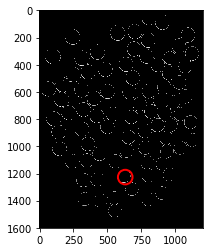

In [341]:
param,w,hparam = IWLS(best_circle,pts,canny1.n,sigmaGM=100,check=0)

plt.imshow(canny1.S,**{'cmap':'gray'})
a,b =param[:2]
R = param[2]
circle = Circle((b,a),radius=R,color='red',fill=False,**{"linewidth":2})
ax = plt.gca()
ax.add_patch(circle)

print(param)

# Algorithm:

## Load image

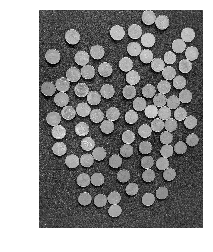

In [345]:
im = plt.imread("img/coins1.jpg")
bw_im = np.mean(im,axis=2)
plot(bw_im,**{'cmap':'gray'})

## Detect edges

Sanity check: True


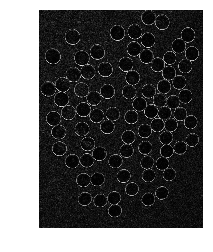

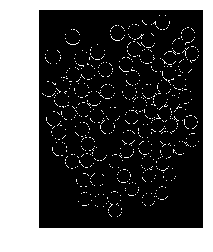

In [348]:
canny1 = canny(bw_im/255,th=0.4,gsize=(7,7),sigma=7/3)

## Fit

In [409]:
def fit(pts,n,d=50,s=300,N=500,T=800,sigmaGM=100):
    circles = get_proposals(pts,n,d,s,N,T)

    best_circle,inliers = best_proposal(circles,pts,10)

    param,w,leverage = IWLS(best_circle,pts[inliers],canny1.n,sigmaGM,check=0)
    
    return param,w,inliers,leverage

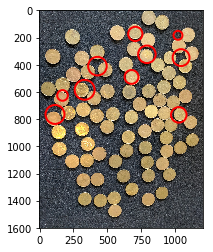

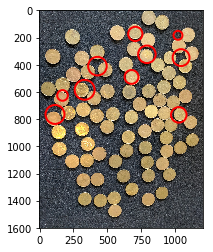

In [413]:
pts = canny1.pts
n = canny1.n

circles=[]
for i in range(10):
    N=0
    while N < 10:
        param,w,inliers,leverage = fit(pts,n)
        pts = pts[~inliers]
        if np.mean(leverage)<0.5:
            circles.append(param)
            
            a,b=param[:2]
            R = param[2]
            plt.imshow(im)#canny1.S,**{'cmap':'gray'})        
            circle = Circle((b,a),radius=R,color='red',fill=False,**{"linewidth":2})
            ax = plt.gca()
            ax.add_patch(circle)
            plt.axis('scaled')    

            pl.plot()
            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(1.0)
            break
        N+=1
    

    



In [ ]:
plt.imshow(canny1.S,**{'cmap':'gray'})        
circle = Circle((b,a),radius=R,color='red',fill=False,**{"linewidth":2})
ax = plt.gca()
ax.add_patch(circle)
plt.axis('scaled')    

pl.plot()
display.clear_output(wait=True)
display.display(pl.gcf())
time.sleep(1.0)